<a href="https://colab.research.google.com/github/alessandrotofani/Tesi_magistrale/blob/master/2_eda_Feature_engineering_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --quiet fastai==2.2.5

     |████████████████████████████████| 194kB 5.6MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 311kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


In [3]:
import sys 
sys.path.append('/content/drive/MyDrive/Tesi_magistrale/Tesi_magistrale')
import mf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Card type

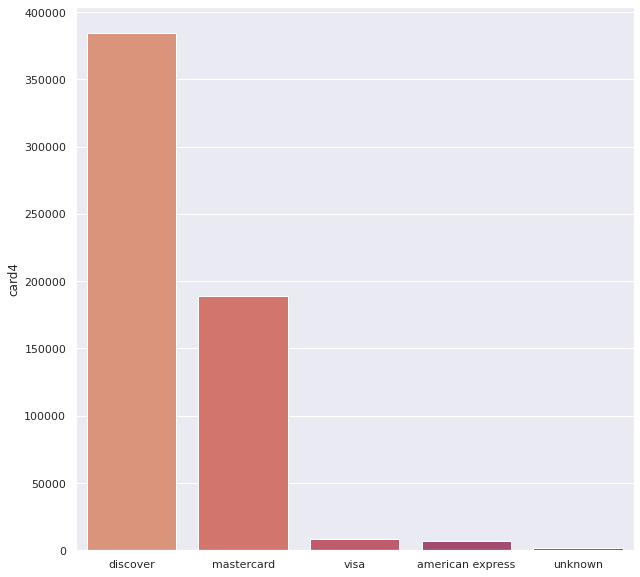

In [5]:
x = data['card4'].unique()
y = data['card4'].value_counts()
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=x, y=y, palette=sns.color_palette("flare"))

# Feature engineering and scaling

In [6]:
data = mf.new_processing(data)
data = pd.get_dummies(data)

# New feature analysis

`get_important_features_by_ratio(data, tresh=0.4)`: restituisce un dizionario con le feature con rate di transazioni fraudolente ordinate per valore e sopra soglia 

In [9]:
important_features, feature_ratio = mf.get_important_features_by_ratio(data)

Barplot dei rate individuati per feature. 

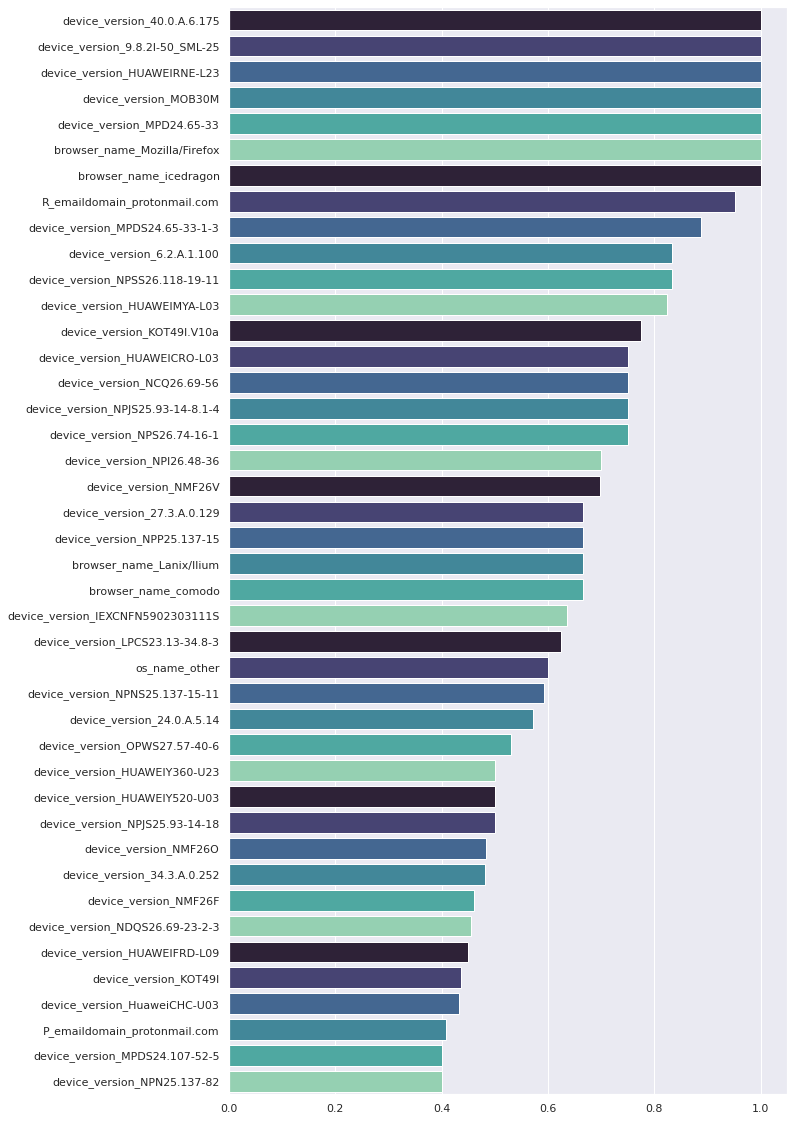

In [10]:
x = []
for feature in important_features:
  x.append(feature_ratio[feature])
sns.set(rc={'figure.figsize':(10,20)})
sns.barplot(x=x, y=important_features, palette = sns.color_palette('mako'))